In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_excel('data/Evaluation Results.xlsx', sheet_name='Scenarios')

In [ ]:
df1

,User,Scenario,Time(sec)
0,D1,1,74
1,D1,2,104
2,D1,3,60
3,D1,4,30
4,D2,1,63
5,D2,2,80
6,D2,3,27
7,D2,4,33
8,D3,1,37
9,D3,2,118


In [ ]:
df2 = pd.read_excel('data/Evaluation Results.xlsx', sheet_name='Interview')

In [ ]:
df2

,User,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,D1,15 years,5,5,5,5,4,4,5,5,Often mobile applications are too complicated ...
1,D2,8 years,4,5,4,5,4,5,5,5,Often mobile applications are too complicated ...
2,D3,15 years,4,5,3,3,5,4,4,5,"Liked the simplicity, but there could have bee..."
3,CB1,12 years,5,5,5,5,5,5,5,5,"Application is simple to use. Liked, text to ..."
4,CB2,9 years,4,5,4,5,5,4,4,5,Liked simplicity and color choices. Suggestion...
5,CB3,12 years,4,5,4,5,4,3,4,2,"Liked simplicity. Suggestions, to choose card ..."
6,N1,12 years,4,5,5,5,5,2,3,5,"Liked simplicity. Suggestions, to choose card ..."
7,N2,10 years,5,5,4,5,5,4,4,5,"Liked simplicity. Suggestions, to choose card ..."
8,N3,8 years,5,5,5,4,5,4,5,4,Liked simplicity and text-to-speech. Suggestio...


In [ ]:
pivot_table_df1 = pd.pivot_table(df1, values='Time(sec)', index='User', aggfunc='sum').reset_index()

# Convert time from seconds to minutes
pivot_table_df1['Total Time (min)'] = pivot_table_df1['Time(sec)'] / 60

In [ ]:
pivot_table_df1

,User,Time(sec),Total Time (min)
0,CB1,152,2.533333
1,CB2,162,2.700000
2,CB3,154,2.566667
3,D1,268,4.466667
4,D2,203,3.383333
5,D3,229,3.816667
6,N1,136,2.266667
7,N2,128,2.133333
8,N3,124,2.066667


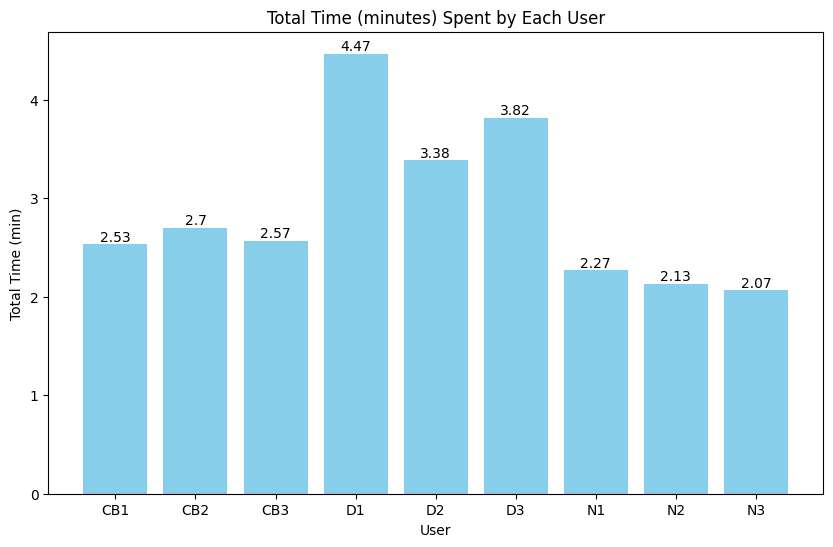

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(pivot_table_df1['User'], pivot_table_df1['Total Time (min)'], color='skyblue')

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.title('Total Time (minutes) Spent by Each User')
plt.xlabel('User')
plt.ylabel('Total Time (min)')
plt.show()

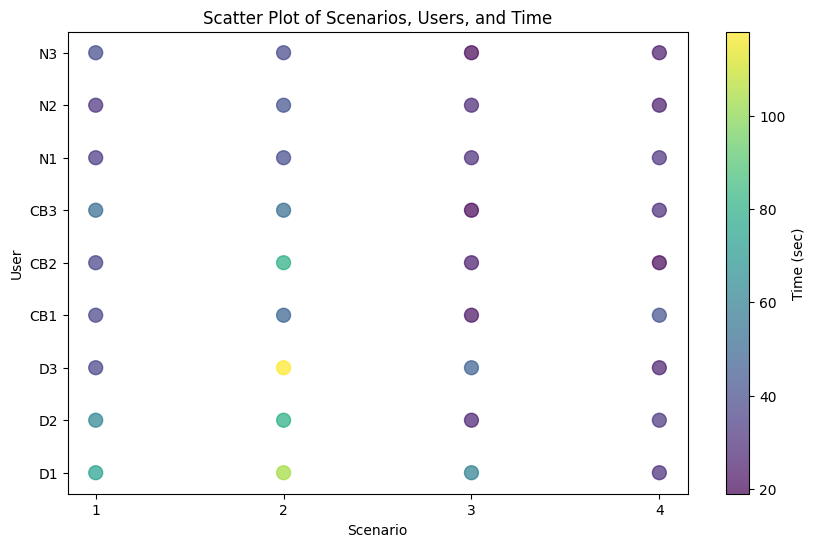

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Scenario'], df1['User'], s=100, c=df1['Time(sec)'], alpha=0.7)
plt.colorbar(label='Time (sec)')
plt.title('Scatter Plot of Scenarios, Users, and Time')
plt.ylabel('User')
plt.xlabel('Scenario')
plt.xticks([1, 2, 3, 4])
# plt.grid(True)
plt.show()

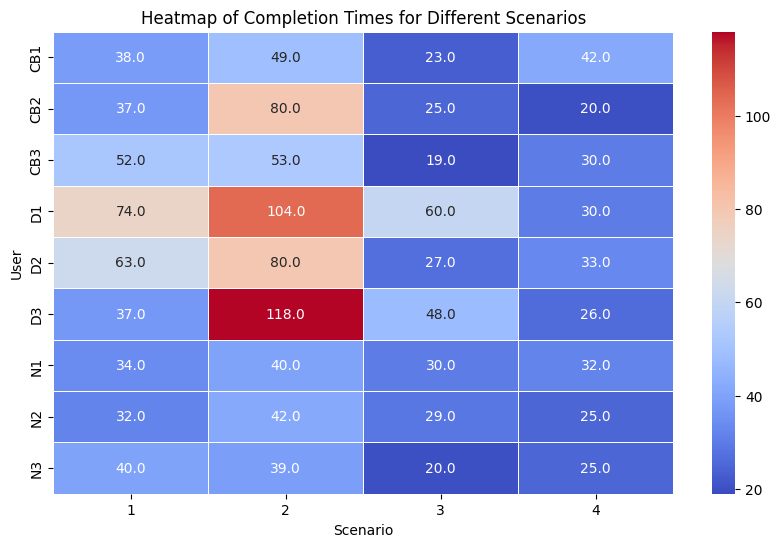

In [ ]:
pivot_table = pd.pivot_table(df1, values='Time(sec)', index='User', columns='Scenario', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Completion Times for Different Scenarios')
plt.xlabel('Scenario')
plt.ylabel('User')
plt.show()

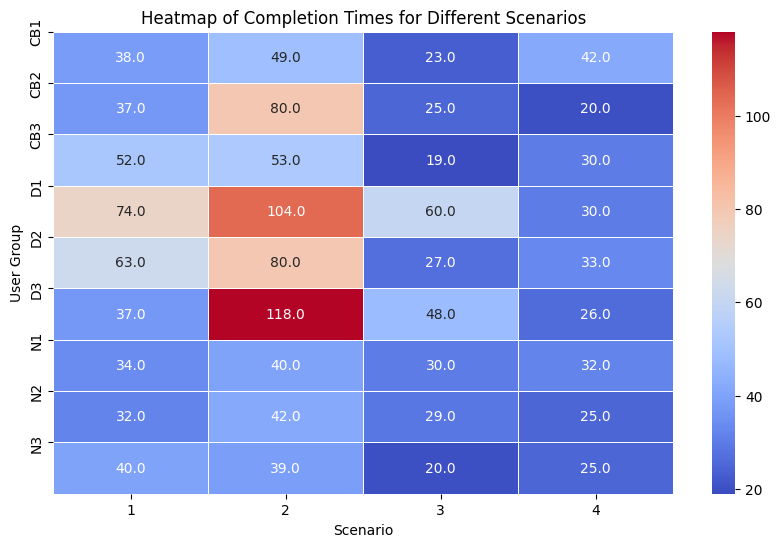

In [ ]:
grouped_pivot_table = df1.groupby('User')['Time(sec)'].sum().reset_index()

pivot_table = pd.pivot_table(df1, values='Time(sec)', index='User', columns='Scenario', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)

plt.yticks(ticks=range(len(grouped_pivot_table)), labels=grouped_pivot_table['User'])

plt.title('Heatmap of Completion Times for Different Scenarios')
plt.xlabel('Scenario')
plt.ylabel('User Group')
plt.show()


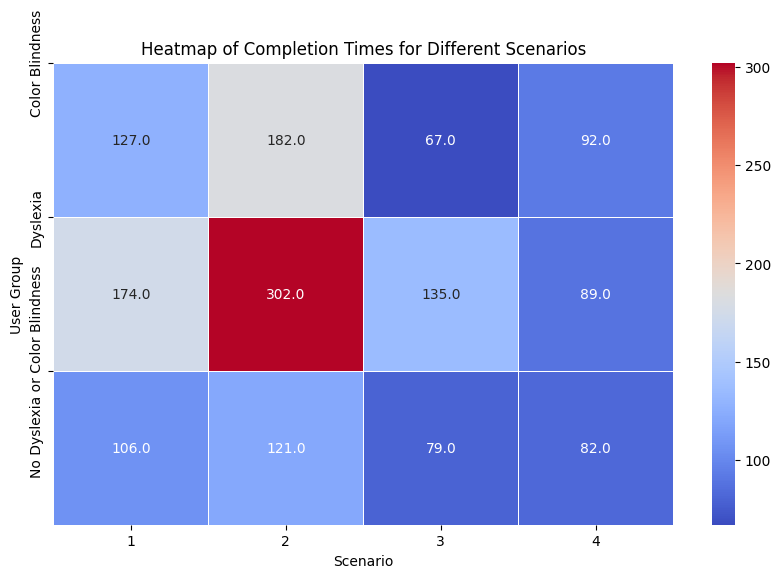

In [ ]:
user_groups = {
    'Dyslexia': ['D1', 'D2', 'D3'],
    'Color Blindness': ['CB1', 'CB2', 'CB3'],
    'No Dyslexia or Color Blindness': ['N1', 'N2', 'N3']
}

grouped_pivot_table = df1.groupby(df1['User'].map({user: group for group, users in user_groups.items() for user in users}))['Time(sec)'].sum().reset_index()

pivot_table = pd.pivot_table(df1, values='Time(sec)', index=df1['User'].map({user: group for group, users in user_groups.items() for user in users}), columns='Scenario', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)

plt.yticks(ticks=range(len(grouped_pivot_table)), labels=grouped_pivot_table['User'])

plt.title('Heatmap of Completion Times for Different Scenarios')
plt.xlabel('Scenario')
plt.ylabel('User Group')
plt.show()


In [ ]:
df2

,User,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,D1,15 years,5,5,5,5,4,4,5,5,Often mobile applications are too complicated ...
1,D2,8 years,4,5,4,5,4,5,5,5,Often mobile applications are too complicated ...
2,D3,15 years,4,5,3,3,5,4,4,5,"Liked the simplicity, but there could have bee..."
3,CB1,12 years,5,5,5,5,5,5,5,5,"Application is simple to use. Liked, text to ..."
4,CB2,9 years,4,5,4,5,5,4,4,5,Liked simplicity and color choices. Suggestion...
5,CB3,12 years,4,5,4,5,4,3,4,2,"Liked simplicity. Suggestions, to choose card ..."
6,N1,12 years,4,5,5,5,5,2,3,5,"Liked simplicity. Suggestions, to choose card ..."
7,N2,10 years,5,5,4,5,5,4,4,5,"Liked simplicity. Suggestions, to choose card ..."
8,N3,8 years,5,5,5,4,5,4,5,4,Liked simplicity and text-to-speech. Suggestio...


In [ ]:
q_meanings = ['User', 'Phone Usage Duration',
'Navigation Ease',
'Text Readability Rating',
'Screen Crowdedness Rating',
'Text Background Contrast Rating',
'Icon Usage Rating',
'Functionality Ease Rating',
'Feedback Clearness Rating',
'Color Font Choices Rating',
'Comments']

In [ ]:
df3 = df2.copy()

In [ ]:
df3.columns = q_meanings

In [ ]:
df3['Functionality Ease Rating'].value_counts()

Functionality Ease Rating
4    5
5    2
3    1
2    1
Name: count, dtype: int64

In [ ]:
df3.drop('Phone Usage Duration', axis=1)

,User,Navigation Ease,Text Readability Rating,Screen Crowdedness Rating,Text Background Contrast Rating,Icon Usage Rating,Functionality Ease Rating,Feedback Clearness Rating,Color Font Choices Rating,Comments
0,D1,5,5,5,5,4,4,5,5,Often mobile applications are too complicated ...
1,D2,4,5,4,5,4,5,5,5,Often mobile applications are too complicated ...
2,D3,4,5,3,3,5,4,4,5,"Liked the simplicity, but there could have bee..."
3,CB1,5,5,5,5,5,5,5,5,"Application is simple to use. Liked, text to ..."
4,CB2,4,5,4,5,5,4,4,5,Liked simplicity and color choices. Suggestion...
5,CB3,4,5,4,5,4,3,4,2,"Liked simplicity. Suggestions, to choose card ..."
6,N1,4,5,5,5,5,2,3,5,"Liked simplicity. Suggestions, to choose card ..."
7,N2,5,5,4,5,5,4,4,5,"Liked simplicity. Suggestions, to choose card ..."
8,N3,5,5,5,4,5,4,5,4,Liked simplicity and text-to-speech. Suggestio...


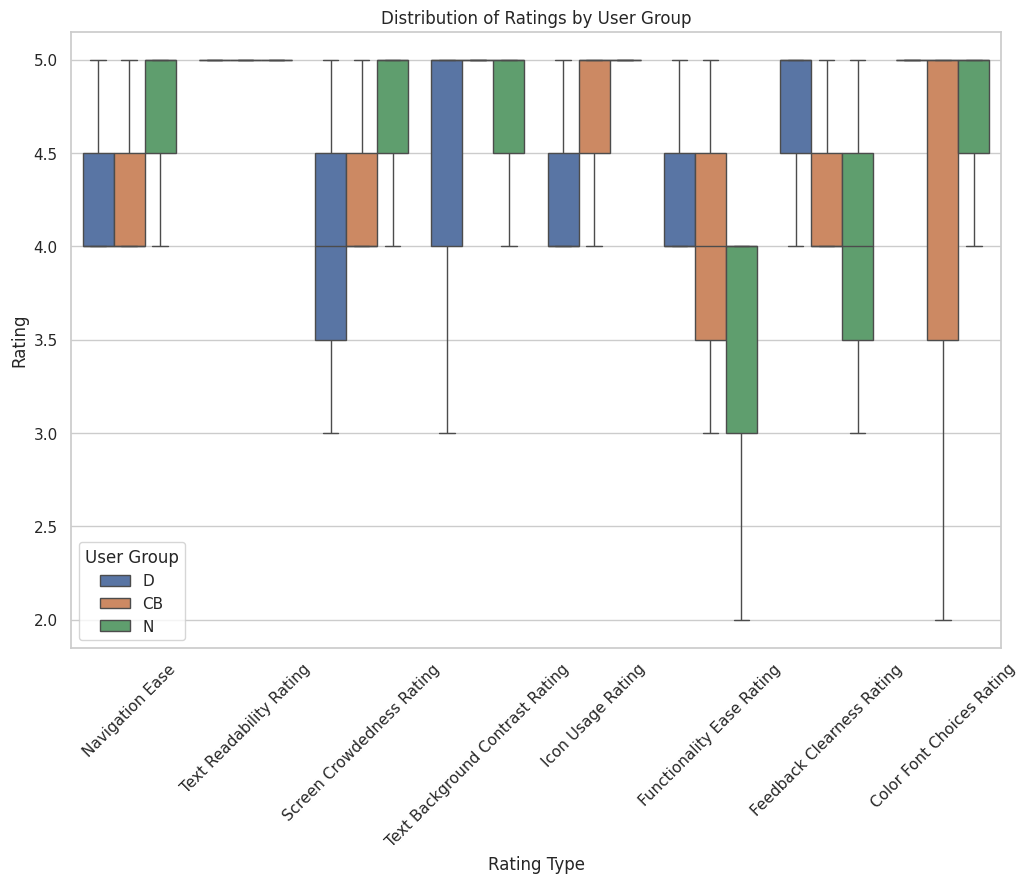

In [ ]:
df = df3.drop('Phone Usage Duration', axis=1).copy()

df['User_Group'] = df['User'].str[0]

df.replace({'C': 'CB'}, inplace=True)

melted_df = df.melt(id_vars=['User', 'User_Group', 'Comments'], var_name='Rating Type', value_name='Rating')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='Rating Type', y='Rating', hue='User_Group', data=melted_df)
plt.title('Distribution of Ratings by User Group')
plt.xticks(rotation=45)
plt.xlabel('Rating Type')
plt.ylabel('Rating')
plt.legend(title='User Group')
plt.show()

In [ ]:
melted_df

,User,User_Group,Comments,Rating Type,Rating
0,D1,D,Often mobile applications are too complicated ...,Navigation Ease,5
1,D2,D,Often mobile applications are too complicated ...,Navigation Ease,4
2,D3,D,"Liked the simplicity, but there could have bee...",Navigation Ease,4
3,CB1,CB,"Application is simple to use. Liked, text to ...",Navigation Ease,5
4,CB2,CB,Liked simplicity and color choices. Suggestion...,Navigation Ease,4
...,...,...,...,...,...
67,CB2,CB,Liked simplicity and color choices. Suggestion...,Color Font Choices Rating,5
68,CB3,CB,"Liked simplicity. Suggestions, to choose card ...",Color Font Choices Rating,2
69,N1,N,"Liked simplicity. Suggestions, to choose card ...",Color Font Choices Rating,5
70,N2,N,"Liked simplicity. Suggestions, to choose card ...",Color Font Choices Rating,5


In [ ]:
melted_df[melted_df['Rating Type'] == 'Icon Usage Rating']

,User,User_Group,Comments,Rating Type,Rating
36,D1,D,Often mobile applications are too complicated ...,Icon Usage Rating,4
37,D2,D,Often mobile applications are too complicated ...,Icon Usage Rating,4
38,D3,D,"Liked the simplicity, but there could have bee...",Icon Usage Rating,5
39,CB1,CB,"Application is simple to use. Liked, text to ...",Icon Usage Rating,5
40,CB2,CB,Liked simplicity and color choices. Suggestion...,Icon Usage Rating,5
41,CB3,CB,"Liked simplicity. Suggestions, to choose card ...",Icon Usage Rating,4
42,N1,N,"Liked simplicity. Suggestions, to choose card ...",Icon Usage Rating,5
43,N2,N,"Liked simplicity. Suggestions, to choose card ...",Icon Usage Rating,5
44,N3,N,Liked simplicity and text-to-speech. Suggestio...,Icon Usage Rating,5


In [ ]:
melted_df

,User,User_Group,Comments,Rating Type,Rating
0,D1,D,Often mobile applications are too complicated ...,Navigation Ease,5
1,D2,D,Often mobile applications are too complicated ...,Navigation Ease,4
2,D3,D,"Liked the simplicity, but there could have bee...",Navigation Ease,4
3,CB1,CB,"Application is simple to use. Liked, text to ...",Navigation Ease,5
4,CB2,CB,Liked simplicity and color choices. Suggestion...,Navigation Ease,4
...,...,...,...,...,...
67,CB2,CB,Liked simplicity and color choices. Suggestion...,Color Font Choices Rating,5
68,CB3,CB,"Liked simplicity. Suggestions, to choose card ...",Color Font Choices Rating,2
69,N1,N,"Liked simplicity. Suggestions, to choose card ...",Color Font Choices Rating,5
70,N2,N,"Liked simplicity. Suggestions, to choose card ...",Color Font Choices Rating,5


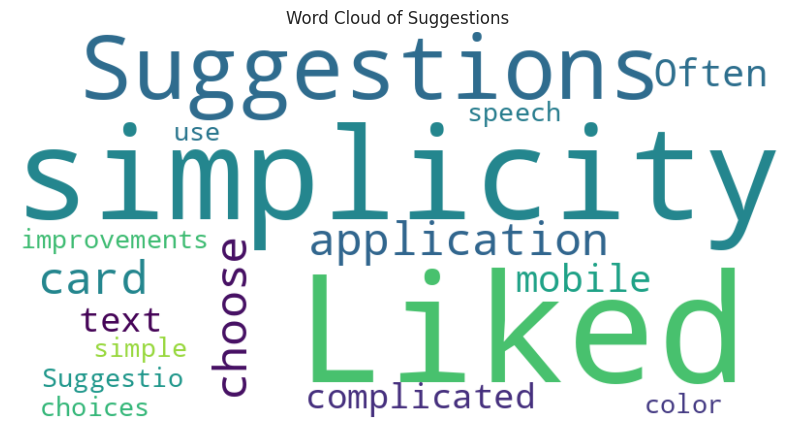

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['Comments'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Suggestions')
plt.show()

In [ ]:
df3

,User,Phone Usage Duration,Navigation Ease,Text Readability Rating,Screen Crowdedness Rating,Text Background Contrast Rating,Icon Usage Rating,Functionality Ease Rating,Feedback Clearness Rating,Color Font Choices Rating,Comments
0,D1,15 years,5,5,5,5,4,4,5,5,Often mobile applications are too complicated ...
1,D2,8 years,4,5,4,5,4,5,5,5,Often mobile applications are too complicated ...
2,D3,15 years,4,5,3,3,5,4,4,5,"Liked the simplicity, but there could have bee..."
3,CB1,12 years,5,5,5,5,5,5,5,5,"Application is simple to use. Liked, text to ..."
4,CB2,9 years,4,5,4,5,5,4,4,5,Liked simplicity and color choices. Suggestion...
5,CB3,12 years,4,5,4,5,4,3,4,2,"Liked simplicity. Suggestions, to choose card ..."
6,N1,12 years,4,5,5,5,5,2,3,5,"Liked simplicity. Suggestions, to choose card ..."
7,N2,10 years,5,5,4,5,5,4,4,5,"Liked simplicity. Suggestions, to choose card ..."
8,N3,8 years,5,5,5,4,5,4,5,4,Liked simplicity and text-to-speech. Suggestio...


In [ ]:
data = {
    'User_Group': ['Intersection', 'D', 'CB', 'N'],
    'Likes': ['Liked the simplicity of the application. Appreciated the text-to-speech function.',
              'Liked the font selection.',
              'Liked the color choices.',
              'More options in "edit profile" such as profile picture.'],
    'Suggestions': ['Add a language option with Azerbaijani.',
                     'Add a card scan option in money transfer. Implement template creation to reduce repetition. Shorten texts in "help" sections. Add buttons/links that redirect to described actions. Consider adding more functionalities.',
                     'Provide more informative feedback messages. Add the ability to copy card details. Offer more background color options.',
                     'Increase spacing between sections. Consider implementing limit increase/decrease font size. Add speech-to-text functionality.']
}

df_comments = pd.DataFrame(data)

In [ ]:
df_comments

,User_Group,Likes,Suggestions
0,Intersection,Liked the simplicity of the application. Appre...,Add a language option with Azerbaijani.
1,D,Liked the font selection.,Add a card scan option in money transfer. Impl...
2,CB,Liked the color choices.,Provide more informative feedback messages. Ad...
3,N,"More options in ""edit profile"" such as profile...",Increase spacing between sections. Consider im...
